# Artificial Neural network Asssignment 2

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
df.shape

(517, 31)

In [6]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [10]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [11]:
# We can see some of the columns mean,median and st so we can drop that columns

df1 = df.drop(columns=['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'])
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


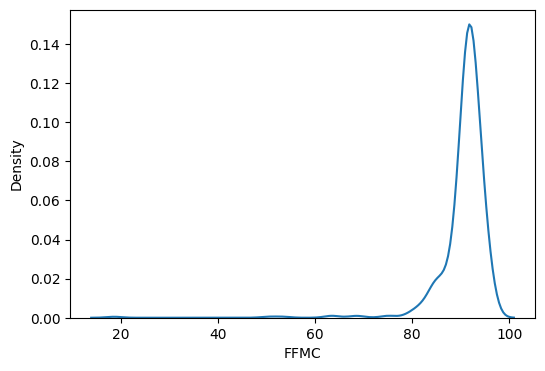

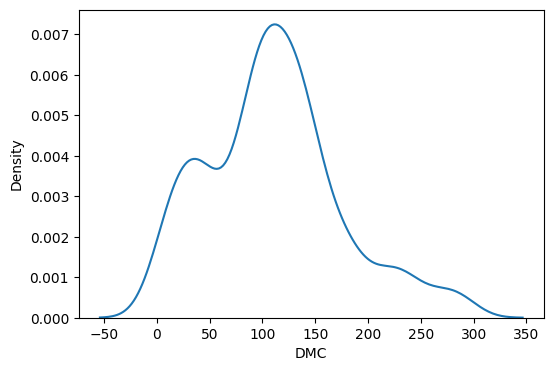

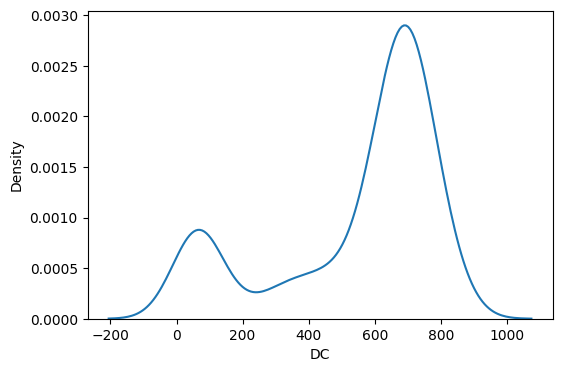

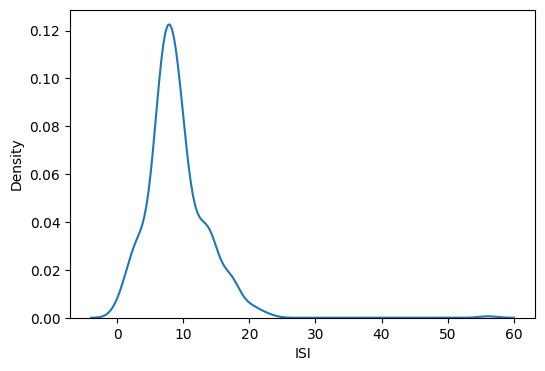

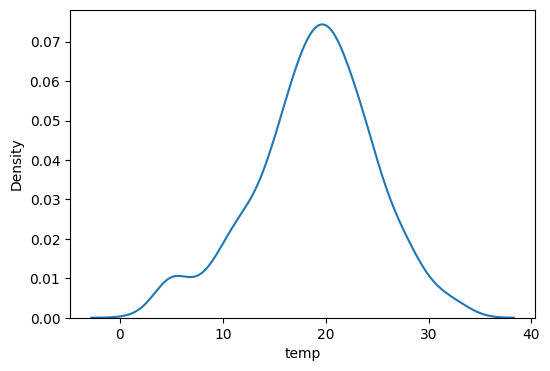

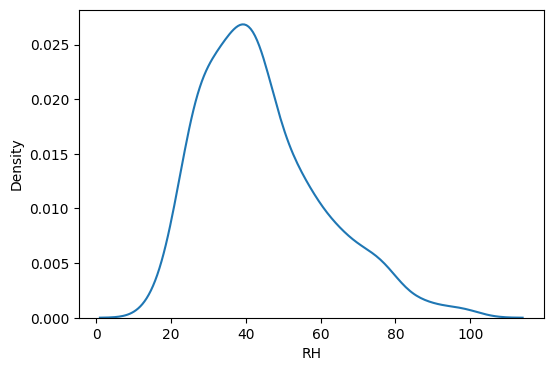

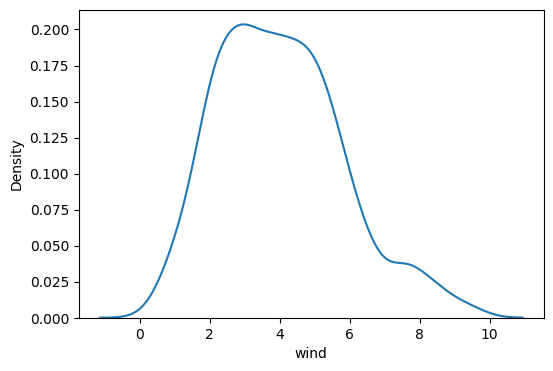

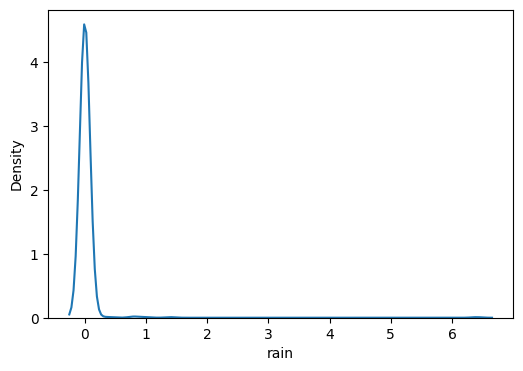

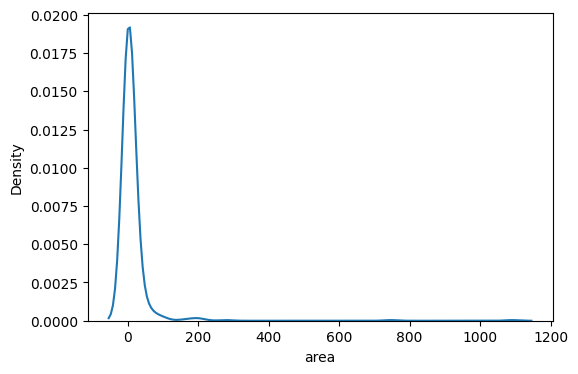

In [12]:
# Checking distrbution of numerical columns

df2 = df1.iloc[:,2:11]
for col in df2.columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(x = df2[col])

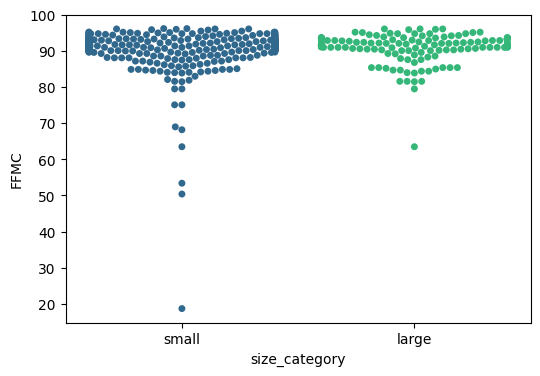

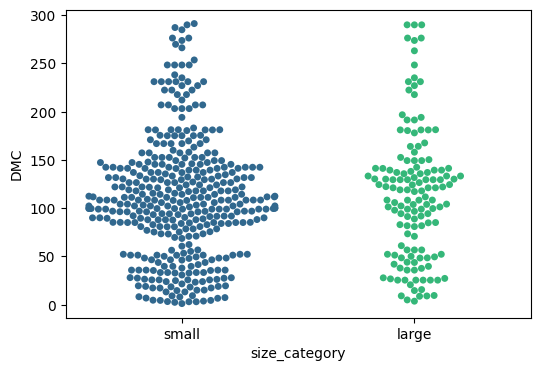

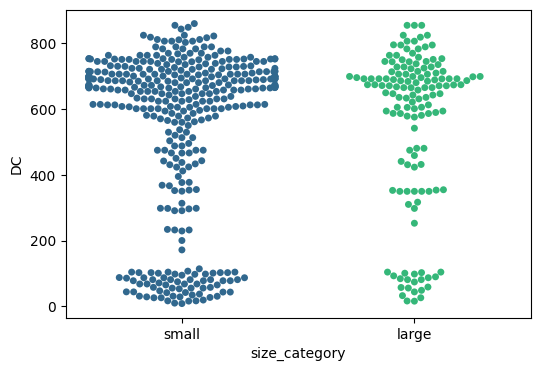

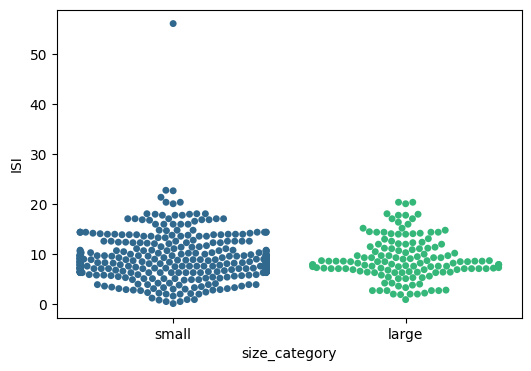

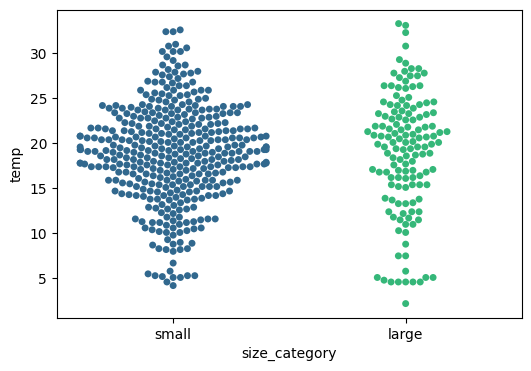

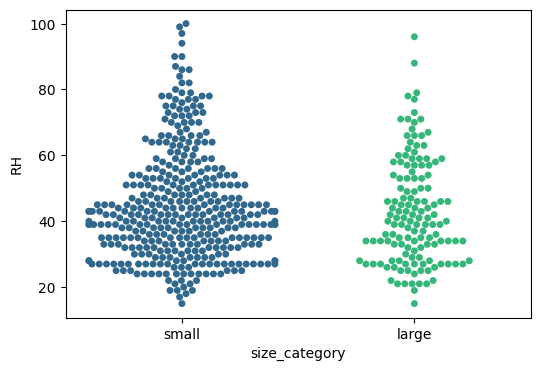

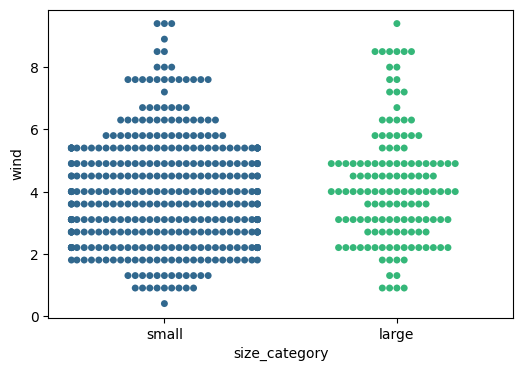

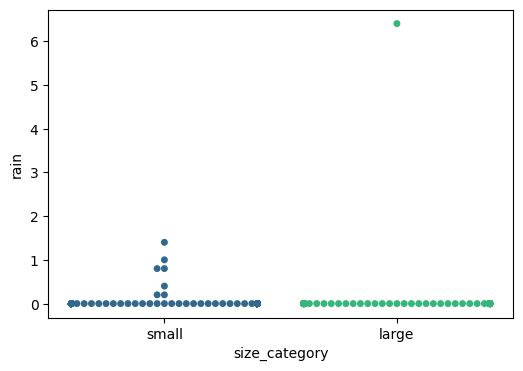

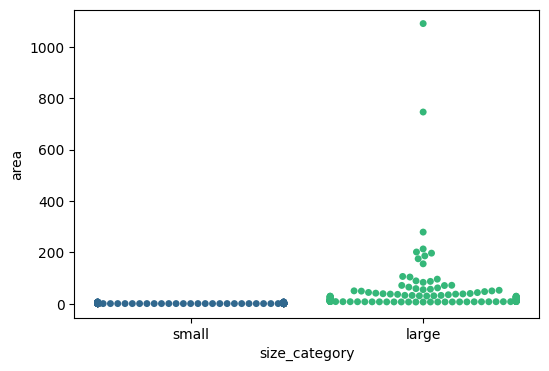

In [16]:
# Checking the Density of Each Columns with size category
df3 = df1.iloc[:,2:12]
df3.head()

for col in df2.columns:
    plt.figure(figsize=(6,4))
    sns.swarmplot(x = df['size_category'], y = df2[col],palette='viridis')

In [17]:
# label Encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['size_category'] = label.fit_transform(df['size_category'])
df['month'] = label.fit_transform(df['month'])
df['day'] =  label.fit_transform(df['day'])

In [18]:
x = df.iloc[:,:-1]
x
y = df.iloc[:,-1:]
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [20]:
# Dividing the data into tran and test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [23]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [29]:
model = Sequential()
model.add(Dense(8, input_dim=30, activation='linear'))
model.add(Dense(4,  activation='tanh'))
model.add(Dense(1,  activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 248       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(30, 8) dtype=float32, numpy=
 array([[-0.19511552, -0.20390294,  0.19091675, -0.08982939, -0.16408563,
         -0.28234747,  0.26612255,  0.2848188 ],
        [ 0.11255816, -0.20965505, -0.366535  ,  0.2488685 ,  0.164543  ,
          0.27334592,  0.15996763, -0.01686686],
        [ 0.3763983 ,  0.3052996 ,  0.26688454, -0.20953189,  0.03110418,
          0.153097  ,  0.20475301,  0.15535268],
        [ 0.2717062 , -0.2307421 , -0.30948865,  0.08796066, -0.13853899,
          0.00697556, -0.29656574,  0.12313148],
        [-0.05177116,  0.25610045, -0.06398591, -0.29168996,  0.25371417,
          0.32860026,  0.25841233, -0.13349324],
        [ 0.05855259, -0.33151427, -0.06859303, -0.05865499, -0.1925089 ,
         -0.14623445, -0.38317552,  0.08153734],
        [ 0.12963757,  0.35422978, -0.15127972, -0.2817651 , -0.15986279,
         -0.19887947, -0.3620506 , -0.18426046],
        [-0.36200672, -0.34260496, -0.37429965, -0.25616512,  0.234030

In [32]:
model.compile(loss="binary_crossentropy" , optimizer= 'adam',metrics=['accuracy'])

In [33]:
history = model.fit(X_train,y_train,epochs=120,batch_size=5,validation_split=0.3)

Epoch 1/120
58/58 [==============================] - 2s 9ms/step - loss: 0.7152 - accuracy: 0.3391 - val_loss: 0.6775 - val_accuracy: 0.3226
Epoch 2/120
58/58 [==============================] - 0s 5ms/step - loss: 0.6696 - accuracy: 0.5675 - val_loss: 0.6247 - val_accuracy: 0.7581
Epoch 3/120
58/58 [==============================] - 0s 4ms/step - loss: 0.6361 - accuracy: 0.7266 - val_loss: 0.5998 - val_accuracy: 0.7581
Epoch 4/120
58/58 [==============================] - 0s 4ms/step - loss: 0.6206 - accuracy: 0.7266 - val_loss: 0.5797 - val_accuracy: 0.7581
Epoch 5/120
58/58 [==============================] - 0s 3ms/step - loss: 0.6060 - accuracy: 0.7266 - val_loss: 0.5682 - val_accuracy: 0.7581
Epoch 6/120
58/58 [==============================] - 0s 4ms/step - loss: 0.5990 - accuracy: 0.7266 - val_loss: 0.5603 - val_accuracy: 0.7581
Epoch 7/120
58/58 [==============================] - 0s 4ms/step - loss: 0.5952 - accuracy: 0.7266 - val_loss: 0.5555 - val_accuracy: 0.7581
Epoch 8/120
5

In [34]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 944us/step - loss: 0.1828 - accuracy: 0.9787
accuracy: 97.87%


In [37]:
y_predict_test = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


In [46]:
preds = pd.DataFrame(y_predict_test, columns =['y_predict_test'])
preds['y_predict_test'] = np.where(preds['y_predict_test'] > 0.5,1,0)
preds.head()
preds.shape

(104, 1)

In [48]:
y_test.shape

(104, 1)

the Testing Accuracy is 0.9615384615384616
classification_report               precision    recall  f1-score   support

           0       0.96      0.90      0.93        30
           1       0.96      0.99      0.97        74

    accuracy                           0.96       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.96      0.96      0.96       104



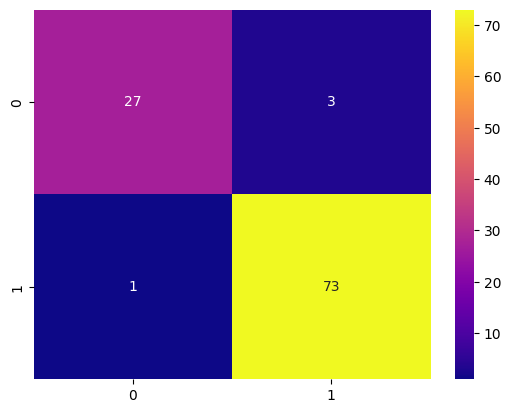

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print('the Testing Accuracy is',accuracy_score(y_test,preds))

sns.heatmap(confusion_matrix(y_test,preds),cmap='plasma',annot=True)

print("classification_report",classification_report(y_test,preds))